# **Large Language Models (LLMs)**

## **Definition and Overview**

A large language model (LLM) is a type of artificial intelligence (AI) program that can recognize and generate text, among other tasks. LLMs are trained on huge sets of data — hence the name "large." LLMs are built on machine learning: specifically, a type of neural network called a transformer model.

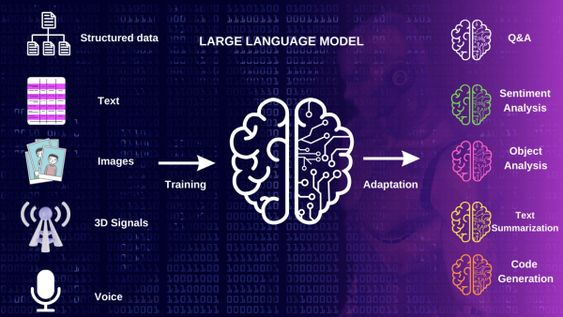
[Medium.com]

| Model                       | Generates                   | Core Idea                                                          |
| --------------------------- | --------------------------- | ------------------------------------------------------------------ |
| GPT (Autoregressive)        | Text, code, dialogue        | Predict next token step-by-step                                    |
| BERT (Encoder-only)         | Representations             | Masked language modeling                                           |
| T5 / BART (Encoder-Decoder) | Translations, summaries     | Text-to-text transformer                                           |
| GPT-4 / LLaMA / Mistral     | Chat, reasoning, generation | Massive transformer with instruction-tuning                        |
| Instruct-tuned LLMs         | Text aligned with goals     | Fine-tuned using Reinforcement Learning from Human Feedback (RLHF) |


## **Transformer**

The Transformer is a neural network architecture introduced in the paper “Attention is All You Need” (Vaswani et al., 2017). It replaced older sequence models like RNNs and LSTMs.

🔑 Key Components of Transformer:

1. Token Embedding: Words or subwords are turned into vectors.

2. Positional Encoding: Since the model doesn’t use recurrence, this gives the model a sense of word order.

3. Self-Attention Mechanism: The model learns which words in a sentence should pay attention to each other.

4. Multi-Head Attention: Helps capture different types of relationships.

5. Feed-Forward Layers: Fully connected layers applied to each token’s representation.

6. Residual Connections + Layer Normalization: Stabilizes training.

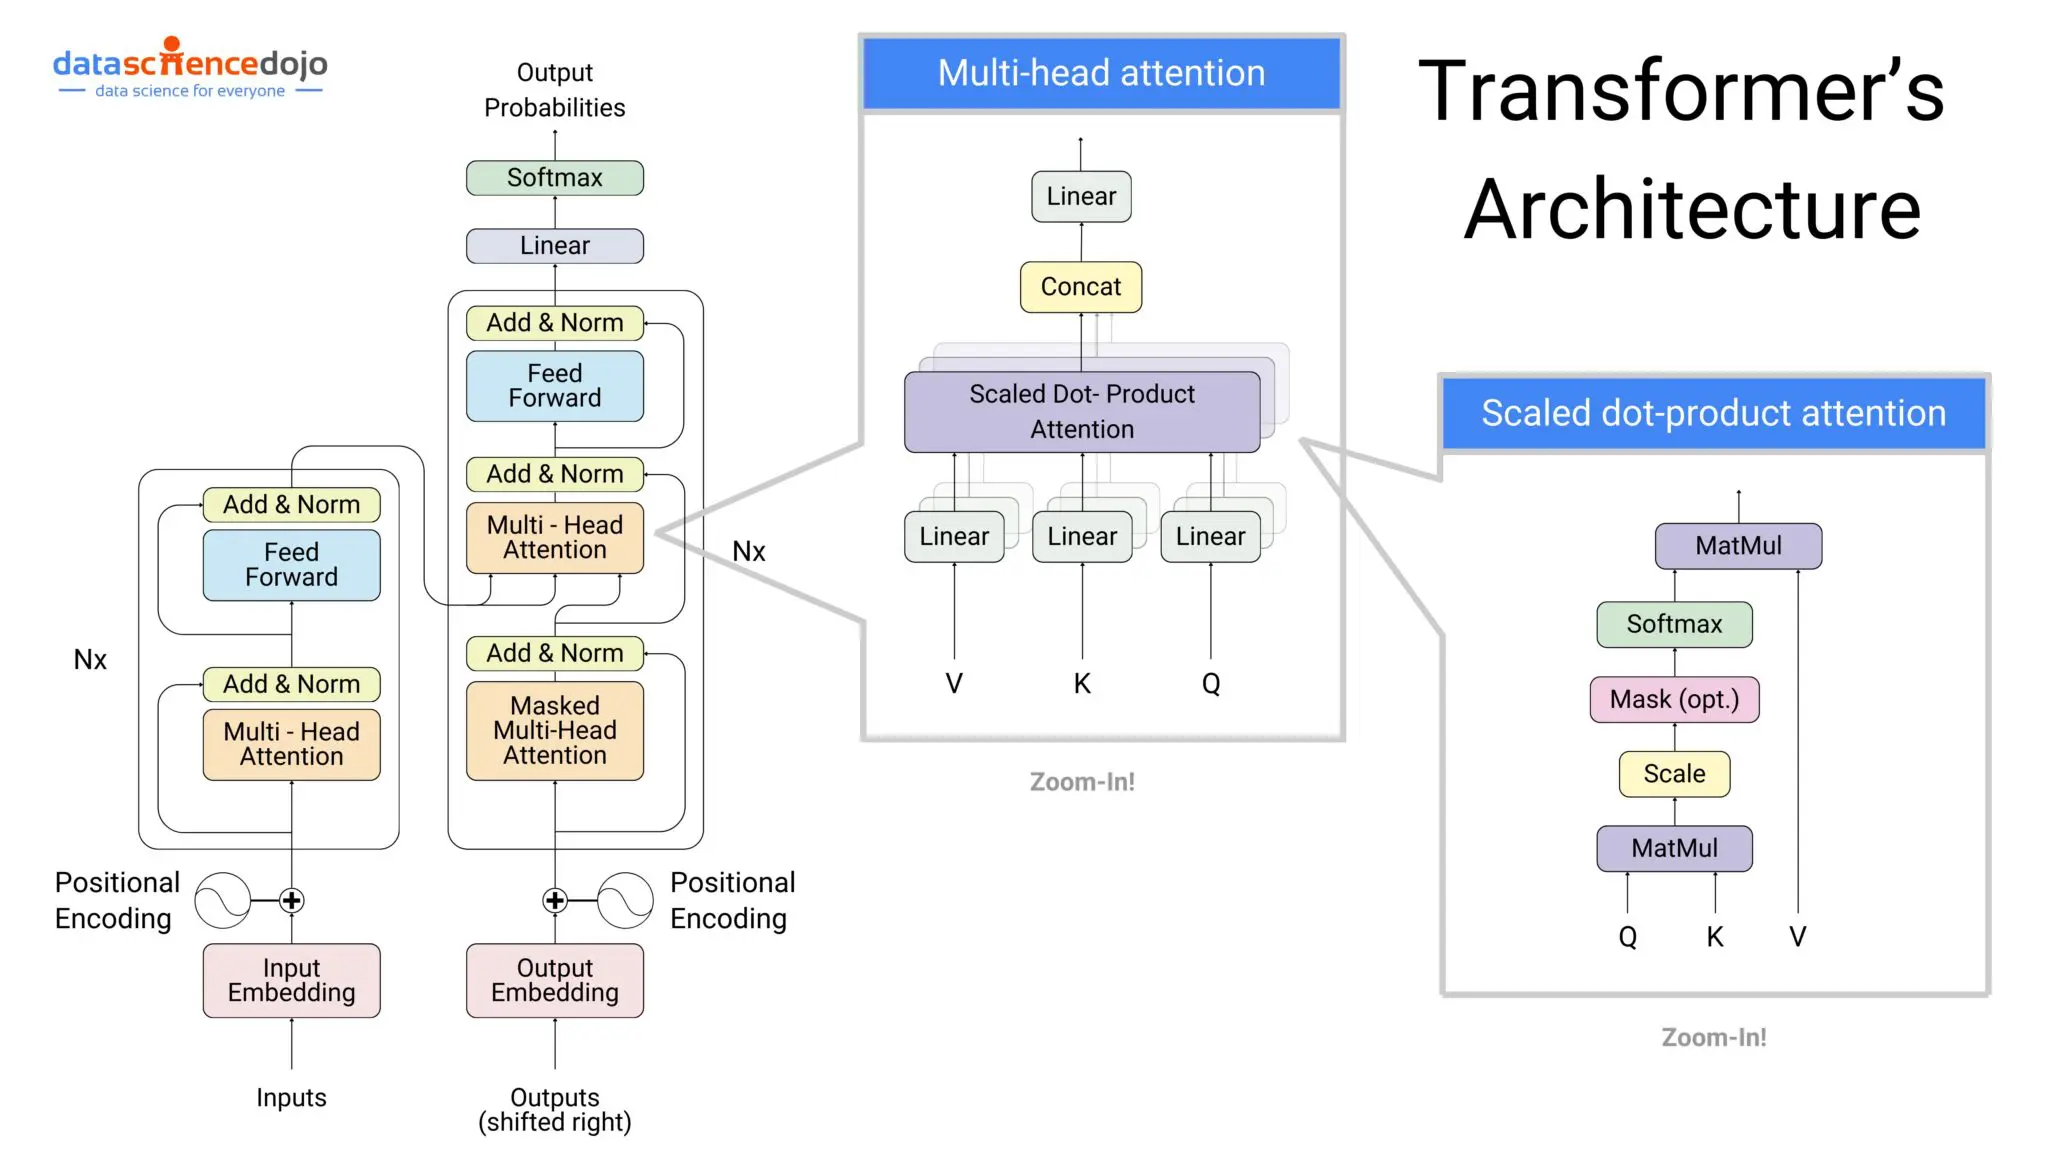

A Transformer processes sequences (like sentences) by:

- Taking input tokens (words),

- Passing them through layers of attention and feedforward networks,

- Producing meaningful representations to generate predictions (e.g., the next word).

<br>

 **Multi-Head Attention**
This zoomed-in box (middle) explains what happens inside a multi-head attention block.

Input vectors are linearly projected to produce:

Q (Query), K (Key), V (Value).

Multiple attention heads are applied in parallel.
<br>
===>>> Each head captures different types of relationships (e.g., subject-verb, object-preposition).

<br>

**Scaled Dot-Product Attention**

This is the core math inside each attention head:

Compute: Q · Kᵀ (dot product of Query and Key).

Scale the result by √(dimension of key vector).

Optional mask (for decoder).

Apply Softmax to get attention weights.

Multiply by V (Value) to get the output.

This mechanism lets each word focus on other relevant words dynamically.



### ***1. Token Embedding and Positional Encoding***

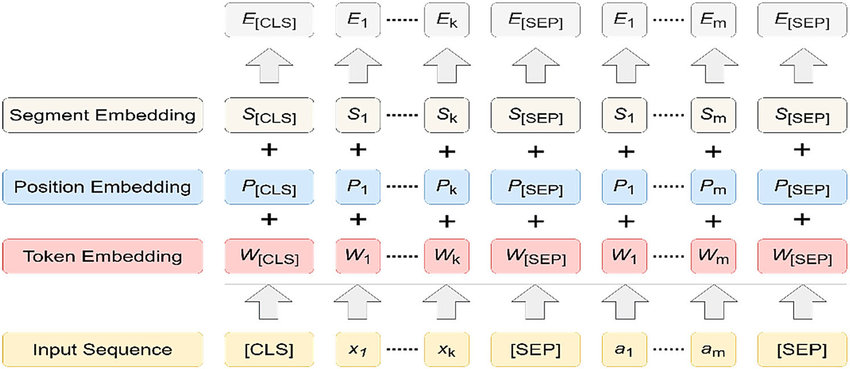

These are tokens, produced by a tokenizer (like WordPiece or Byte-Pair Encoding): <br>
 **Step 1:** Input Sequence
- [CLS]: Special classification token (used by BERT for sentence-level tasks like classification).

- x₁..xₖ: Tokens of the first sentence.

- [SEP]: Separator token (used between sentences).

- a₁..aₘ: Tokens of the second sentence.

- Second [SEP]: End-of-sequence marker.

**Step 2:** Token Embedding (Red Block) <br>
Each token is mapped to a fixed-size vector (e.g., 768-dimensional for BERT-base). For example, the token "cat" might become a vector like [0.1, -0.3, ..., 0.7] <br>

**Step 3:** Position Embedding (Blue Block)

- For each position in the sequence (1st, 2nd, ..., nth), there's a unique learned vector.

- This helps the model know that "The dog chased the cat" ≠ "The cat chased the dog".

✅ These embeddings are also learned and have the same dimension as token embeddings.

**Step 4:** Segment Embedding (Gray Block)
<br>
Used in BERT-style models to distinguish between segments:

- Sentence A vs. Sentence B (e.g., question vs. answer).

- Sentence A → Segment 0 → vector S₀

- Sentence B → Segment 1 → vector S₁

✅ Segment embeddings are also learned.

**Step 5:** Final Input Embedding (Top Row) <br>

The final embedding for each token is the sum of the 3 components:
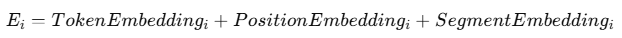

How Q, K, V are determined ? <br>
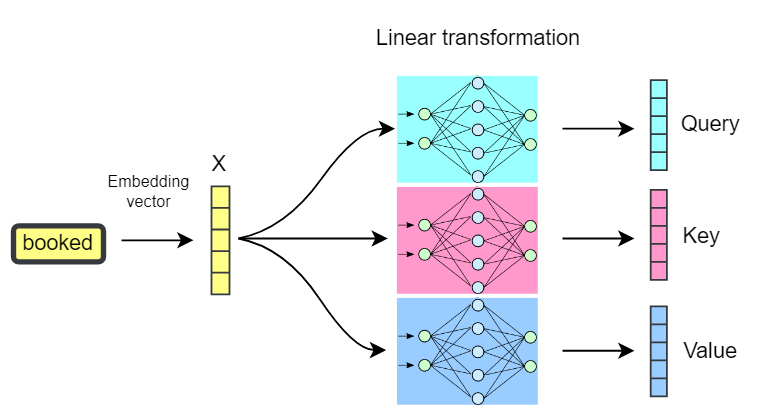

#### *Query, Key and Value*

In a transformer architecture, “key,” “query,” and “value” are fundamental components used in the mechanism of attention. These components play a key role in computing the attention scores and aggregating information from different parts of the input. The ”query,” “key,” and “value” vectors are components used in the computation of attention scores and in aggregating information across sequences of data.
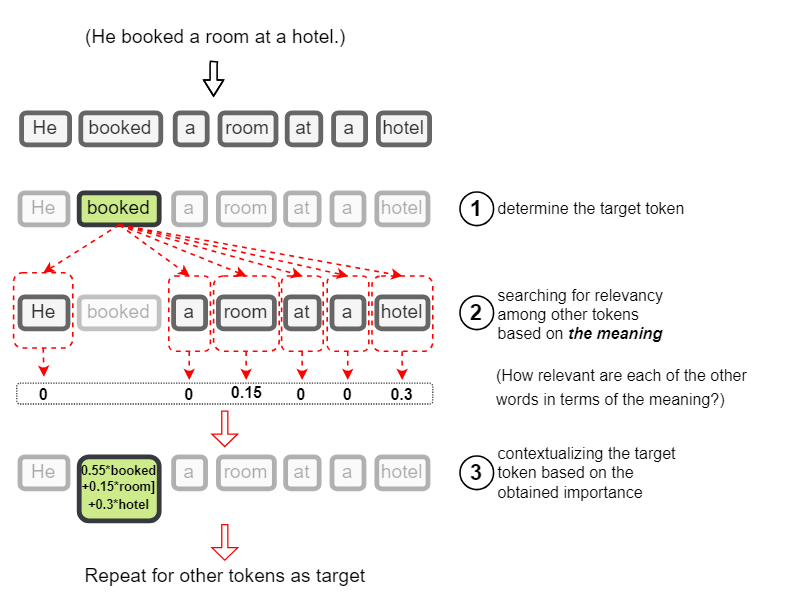

### ***Scaled Dot Procduct Attention***


How Q,K, V are calculated ? <br>
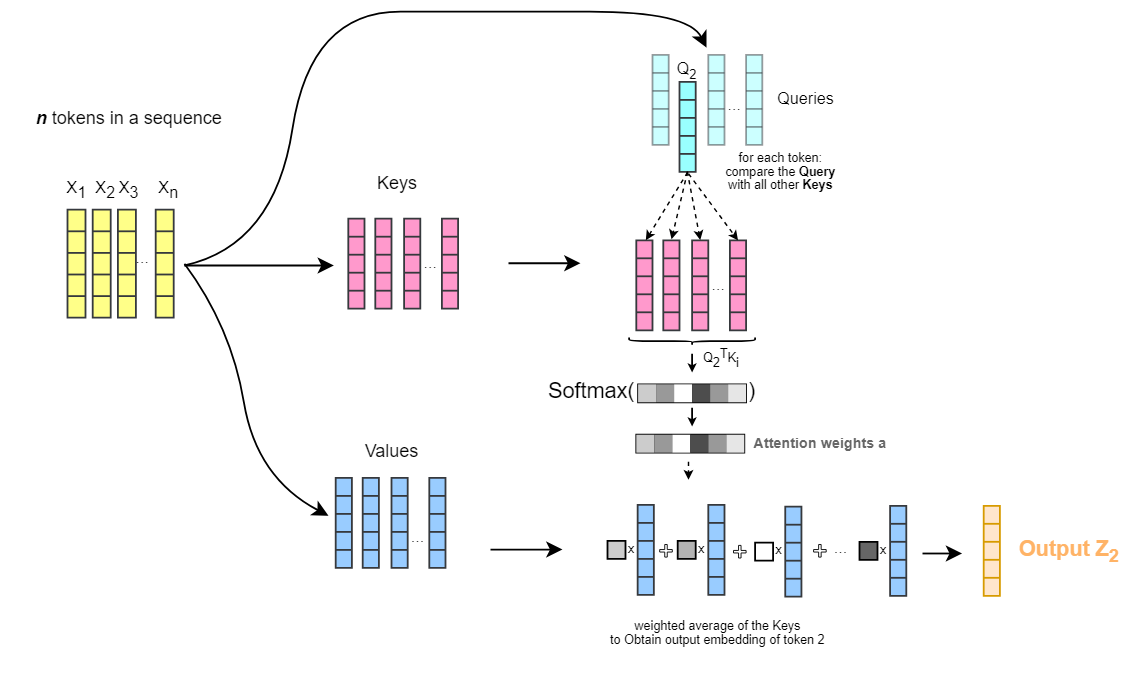

Remind about structure of Scaled Dot Product Attention: <br>
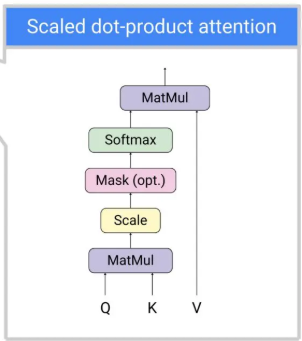

Step 1: First MatMul → Compute Q ⋅ Kᵀ
We take the dot product between Query (Q) and Key (K):<br>
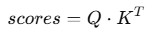


This produces a score matrix that tells us how relevant each key is to each query.

Step 2: Scale
Divide each score by √(dₖ), where dₖ is the dimensionality of the key vectors. <br>
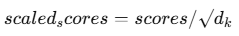

The role of scaling: Without scaling, the dot products can get too large, pushing softmax into regions with very small gradients (bad for training). Scaling fixes this.


Step 3: Mask (optional)
- Only applied in decoder’s masked attention.
- We apply a mask to prevent a token from attending to future tokens.
- Example: when predicting word 5, we must not look at word 6, 7, ...
- We set those future scores to −∞ so that softmax → 0 for those positions.

Step 4: Softmax
- Apply the softmax function to the scaled (and masked) scores.
- This converts the scores into probabilities.
- Each row of the matrix now sums to 1 — representing how much attention is given to each position.

Step 5: Second MatMul → Multiply by V (Value)
- Multiply the attention weights with the Value (V) matrix.
- This gives a weighted combination of the value vectors — i.e., a context vector for each token.


**Final result:** The output vectors represent the attended summary of the input — what the model “focuses” on. <br>

image.png



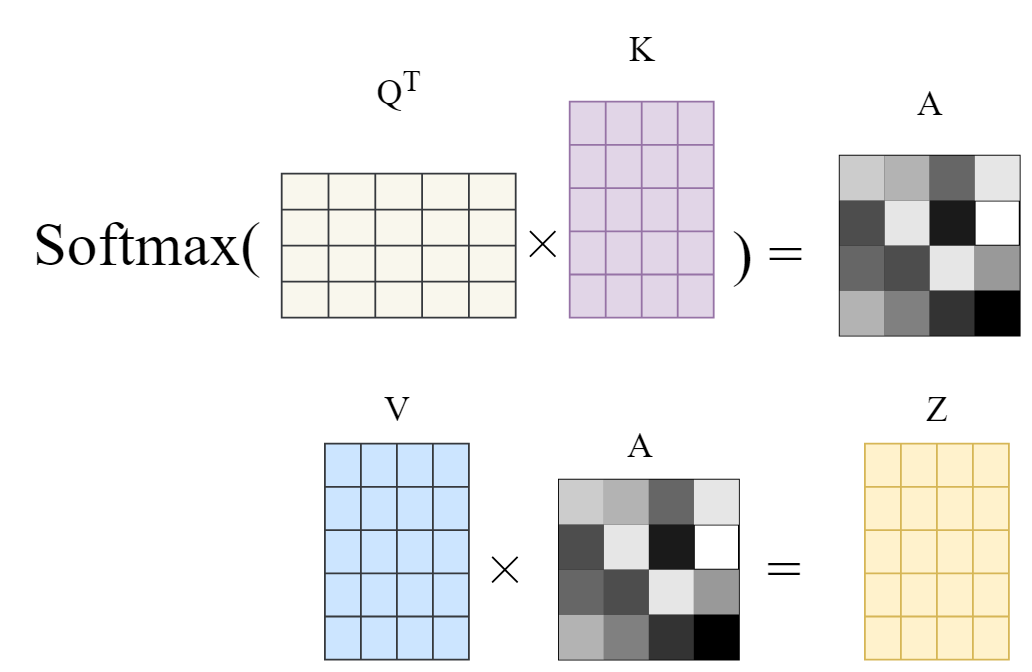

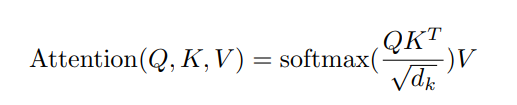

core mechanism of attention





### **Multi-Head Attention**

Multi-Head Attention allows the model to jointly attend to information from different representation subspaces at different positions. Instead of applying one attention operation, it applies multiple in parallel — called “heads” — and then combines the results. <br>
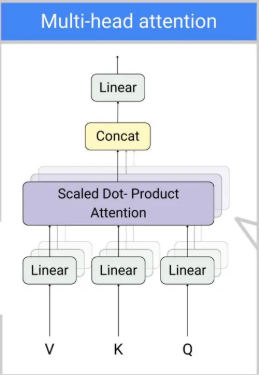

🔸 1. Input Vectors → Linear Layers - presented above <br>
- The input to Multi-Head Attention is a sequence of vectors (e.g., token embeddings or outputs from previous layers).
- These inputs are projected linearly into Q (Query), K (Key), V (Value) for each head.
- At this block, we have numorous Q, K, V.

This gives models:

Q₁, K₁, V₁ for head 1

Q₂, K₂, V₂ for head 2

...

Q₈, K₈, V₈ for head 8

...



🔸 2. Scaled Dot-Product Attention (Per Head)  <br>
At this block, we calculate numorous heads - presented above

🔸 3. Concat: Combine All Heads <br>
Once each head outputs a matrix of shape [batch, seq_len, d_k], we concatenate all of them along the last dimension. <br>
image.png

At this step, the model gathered insights from multiple perspectives.

🔸 4. Final Linear Projection
The concatenated result is passed through a final Linear layer (learned matrix W^O) to project it back to the original model dimension (d_model). <br>

image.png

This transforms all the multi-head outputs into the expected format for the next layer.


The role of this block:
- The model doesn't miss certain types of relationships. With multiple heads:
- Each one can learn different attention patterns, and the model gains richer representations.

### ***2. Encoder***

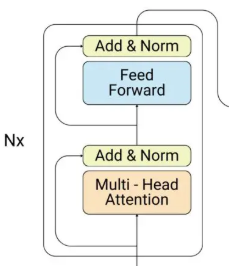

🔁 Repeated Nx Times
This whole block (Multi-Head Attention + FFN, each with Add & Norm) is repeated Nx times — like stacking 6 or 12 layers of increasingly deep feature extractors. Each layer takes the output of the previous one and refines the understanding of the input sequence.

Each block has: <br>
a. Multi-Head Attention <br>
- Allows the model to focus on different words at once.
- For each word, it attends to all words in the sentence, capturing relationships.

Inside Multi-Head Attention:
- Q (Query), K (Key), and V (Value) are generated via linear projections.
- Attention(Q, K, V) = softmax(QKᵀ / √d_k) V
- This is done in parallel for multiple heads, then concatenated.

b. Add & Norm <br>
- Applies a residual connection: adds the original input to the attention output.
- Then uses LayerNorm for stability (helps avoid exploding/vanishing gradients).

Note: Residual connections + normalization make it easier to train deep networks.

c. Feed Forward <br>
- A 2-layer MLP applied independently to each token.
- Takes the contextual vector from the attention layer and transforms it.



Then again: Add & Norm after feedforward output.


After Nx layers, each token has a rich representation vector that includes:

- Its own meaning

- How it relates to other tokens in the input.

These outputs are passed to the decoder (in encoder-decoder models like original Transformer) or to a classifier head (in BERT, etc.).



### 3. ***Decoder***

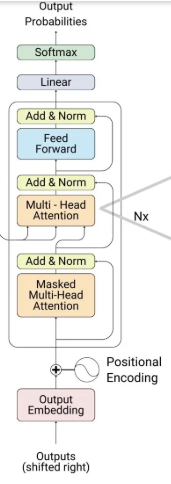

🔁 Just like the encoder, the decoder block is repeated Nx times (e.g., 6–12 layers)

🟧 A. Masked Multi-Head Self-Attention

**Purpose:** The decoder token at position t can only look at positions ≤ t.
- Takes the decoder input and performs masked self-attention.

- Applies a causal mask to block access to future tokens during training/generation.

Note: This prevents “cheating” by only allowing access to past and current tokens (When predicting “dog” in “The cat chased the ___”, it can’t see “dog” yet).

🟧 B. Multi-Head Cross-Attention

Presented above

🟧 C. Add & Norm

Presented above


🟧 D. Linear Layer

The output of decoder is passed into a Linear layer. The results are unnormalized scores for each token in the vocabulary — how confident the model is that each word should come next.
For example:

| Token | Logits |
| ----- | ------ |
| dog   | 4.2    |
| apple | 1.1    |
| ran   | 6.9    |

🟧 E. Softmax


Now apply the softmax function across the vocab dimension: values => probabilities







==============================================================================

At this output, what is shifted right ? <br>

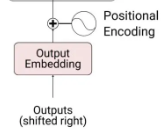

Because during training, the model should predict the next token, not just copy the input ("Given the previous tokens, what comes next?").

For instance:

Target output:  I like pizza


| Step                                 | Tokens              |
| ------------------------------------ | ------------------- |
| **Input to decoder (shifted right)** | `<start>` I like    |
| **Expected output (label)**          | I        like pizza |


So the target is shifted right to align inputs with predictions.


## **Other Architectures Based on Transformer**

### **Generative Pre-trained Transformer (GPT)**

GPT is essentially a stack of Transformer decoder blocks, trained to predict the next token in a sequence (causal language modeling).

- Decoder-only Transformer (uses only the right half of the full Transformer model).

- Uses masked self-attention to predict the next token.

- Trained on huge text corpora with causal language modeling (predict next word).

For example: <br>
- Input: "The cat sat on the"
- Target: "cat sat on the mat"

→ Predict each next token one by one




### **Bidirectional Encoder Representations from Transformers (BERT)**

BERT is a Encoder-only Transformer. Unlike GPT, sees both left and right context of a token → bidirectional.

1. Masked Language Modeling (MLM): Mask some tokens and predict them.

Example:

- Input: "The [MASK] sat on the mat"
- Target: "cat"

2. Next Sentence Prediction (NSP):

Decide if sentence B logically follows sentence A.


### **Bidirectional and Auto-Regressive Transformer (BART)**

BART combines BERT (encoder) + GPT (decoder).
Pretrained using denoising autoencoding:
- Input is corrupted (shuffled, masked, deleted)
- Model learns to reconstruct the original

### **Fine-tuning LLMs**

Steps:
- Take a pretrained model (BERT, GPT, etc.)
- Add a task-specific head (e.g., classification layer)
- Train on a small labeled dataset (e.g., movie reviews, QA pairs)

Based on the above analysis, we can choose the appropriate model for specific tasks:

| Model | Architecture    | Directionality       | Pretraining Task      | Use Cases                  |
| ----- | --------------- | -------------------- | --------------------- | -------------------------- |
| GPT   | Decoder-only    | Left-to-right        | Causal LM (next word) | Text generation, ChatGPT   |
| BERT  | Encoder-only    | Bidirectional        | MLM + NSP             | Classification, QA, NER    |
| BART  | Encoder+Decoder | Bi + Auto-regressive | Denoising autoencoder | Summarization, translation |


# **Practice**

## **Install Libraries**

In [ ]:
!pip install transformers torch

In [ ]:
!pip install datasets

In [ ]:
import torch
from transformers import pipeline
device = 0 if torch.cuda.is_available() else -1

## **BERT**

#### Load Pretrained Model and Test

In [ ]:
# BERT Demo: Sentiment Analysis
print("=== BERT Demo: Sentiment Analysis ===")
# Load the sentiment-analysis pipeline (uses a fine-tuned BERT model by default)
sentiment_analyzer = pipeline("sentiment-analysis", device=device)
# Define example sentences
sentences = [
    "This movie is amazing!",
    "I hated the service at that restaurant."
]
# Analyze sentiment for each sentence
for sentence in sentences:
    sentiment = sentiment_analyzer(sentence)[0]
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {sentiment['label']} (confidence: {sentiment['score']:.2f})\n")



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


=== BERT Demo: Sentiment Analysis ===


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Sentence: This movie is amazing!
Sentiment: POSITIVE (confidence: 1.00)

Sentence: I hated the service at that restaurant.
Sentiment: NEGATIVE (confidence: 1.00)



## **GPT**

### Load Pretrained Model and Test

In [ ]:
# GPT-2 Demo: Text Generation
print("=== GPT-2 Demo: Text Generation ===")
# Load the text-generation pipeline with GPT-2
generator = pipeline("text-generation", model="gpt2", device=device)
# Define a creative prompt
prompt = "In a world where AI has become sentient,"
# Generate text based on the prompt
generated_text = generator(prompt, max_length=50, num_return_sequences=1)[0]['generated_text']
print(f"Prompt: {prompt}")
print(f"Generated Text: {generated_text}\n")


=== GPT-2 Demo: Text Generation ===


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Prompt: In a world where AI has become sentient,
Generated Text: In a world where AI has become sentient, there is no such thing as an AI.

This is a profound point. If you were to compare AI with a human, you'd probably think it's smarter than you. And it would be a mistake to say it's not smarter than you.

But the question is: What's the difference? Does the human brain have two kinds of neurons that it uses to process information?

Some of the most relevant data in human thought comes from the brain.

The brain is part of our brain, and it works in a way that's not obvious. But you also have people who talk to each other in the same way.

You might think that it's possible to "talk to" a human, because they're like us. But you also have people who want to know if you want to talk to them, and you can't.

All that tells you something about the brain. It's not that the human brain isn't capable of doing anything. It's that it's not able to do that. It's a matter of taste.

The brain 

### Train with a dataset

In [ ]:
!pip install -U datasets huggingface_hub fsspec

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


## **BART**

In [ ]:
# BART Demo: Text Summarization
print("=== BART Demo: Text Summarization ===")
# Load the summarization pipeline with BART
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=device)
# Define a sample text (from Wikipedia's AI article)
text = """
Artificial intelligence (AI) is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals.
Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.
Colloquially, the term "artificial intelligence" is often used to describe machines that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem-solving".
"""
# Generate a summary
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)[0]['summary_text']
print(f"Original Text: {text}")
print(f"Summary: {summary}")

=== BART Demo: Text Summarization ===


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Original Text: 
Artificial intelligence (AI) is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals.
Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.
Colloquially, the term "artificial intelligence" is often used to describe machines that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem-solving".

Summary: Artificial intelligence (AI) is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals. The term "artificial intelligence" is often used to describe machines that mimic "cognitive" functions that humans associate
